# ★☆ Assignment ☆★

## 우리의 목표 : 나이브베이즈 문제 해결하기
1.1) 입력문서가 {fast, furious, fun} 만을 주요 단어로 가질때, 이 문서는 얼마의 확률로 어떤 문서로 분류되는가?

##### 노트북 파일을 따라오면서, 빈칸과 질문에 대한 물음을 모두 채우시면 과제 완료 입니다 : )

### 1. 주어진 dataset 을 확인해 보기위해 엑셀 파일을 읽습니다.

In [1]:
import numpy as np
import pandas as pd

In [3]:
documents = pd.read_excel('test_file.xlsx') 

In [4]:
documents 

,label,message
0,comedy,"Fun couple, love love"
1,action,"fast Furious, shoot!!"
2,comedy,"couple^^, fly, fast, fun, fun"
3,action,"furious, shoot shoot fun"
4,action,"fly~~ fast shoot, Love"


### 2. 파일에 어떤 문제점이 보이시나요? (어떤 부분을 전처리 해주어야 할까요?)

####  Q1. 발견한 문제점(전처리가 필요한 부분)을 2가지 이상 적어주세요.
- 1. message 부분에 특수문자가 들어가 있다.
- 2. 대소문자가 구분되어 있다. 예를 들어 Fun과 fun으로 구분되어 있다.
- 3. 단어단어가 애매하게 구분되어 있다. 어느 부분은 ','로 구분되고, 어느 부분은 ' '로 구분되어 있다.

### step 1. 단어를 모두 소문자로 바꾸어 줍니다. 
#### Q2.왜 이 과정이 필요할까요? 
- A. 파이썬의 경우, 대소문자를 구분하기 때문이다. 즉, 파이썬에겐 Fun과 fun은 서로 다른 단어로 인식하기 때문이다.

#### Q3. 코드속 빈칸을 채워주세요

In [5]:
lower_documents = []
lower_documents = [d.lower() for d in documents['message']]
print(lower_documents)

['fun couple, love love', 'fast furious, shoot!!', 'couple^^, fly, fast, fun, fun', 'furious, shoot shoot fun', 'fly~~ fast shoot, love']


### step2. 특수문자를 없애줍니다.
#### string.punctuation 에는 특수문자들이 저장되어있는것을 확인할수 있습니다.

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Q4. string.punctuation 을 이용해서 특수문자를 제거해주세요.

In [7]:
import re

del_punctuation_documents = []

for i in lower_documents:
    del_punctuation_documents.append(i.translate(str.maketrans('','',string.punctuation)))
    
del_punctuation_documents

['fun couple love love',
 'fast furious shoot',
 'couple fly fast fun fun',
 'furious shoot shoot fun',
 'fly fast shoot love']

### step 3. 단어를 하나씩 띄어쓰기 단위로 쪼개어 줍니다.
#### Q5. 빈칸을 채워주세요.

In [8]:
preprocessed_documents = [[w for w in d.split()] for d in del_punctuation_documents]
preprocessed_documents

[['fun', 'couple', 'love', 'love'],
 ['fast', 'furious', 'shoot'],
 ['couple', 'fly', 'fast', 'fun', 'fun'],
 ['furious', 'shoot', 'shoot', 'fun'],
 ['fly', 'fast', 'shoot', 'love']]

### step 4. 각각의 단어가 문서에서 몇번 나왔는지 세봅시다.

In [9]:
frequency_list = []
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
frequency_list

[Counter({'fun': 1, 'couple': 1, 'love': 2}),
 Counter({'fast': 1, 'furious': 1, 'shoot': 1}),
 Counter({'couple': 1, 'fly': 1, 'fast': 1, 'fun': 2}),
 Counter({'furious': 1, 'shoot': 2, 'fun': 1}),
 Counter({'fly': 1, 'fast': 1, 'shoot': 1, 'love': 1})]

### step 5. 이제 우리가 하고싶은것은, 문자를 숫자로 변환하는 작업입니다!(그림 참고)
- 이를 위해 CountVectorizer를 사용합니다.
- CountVectorizer는 문서 집합에서 단어 토큰을 생성하고, 각 단어 수를 세어 BOW (Bag of Words) 인코딩한 벡터를 만들어줍니다.

- 문서에 해당단어가 몇번 포함되었는지를 나타낼 때 사용하는 방법입니다.

- 참고 : https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

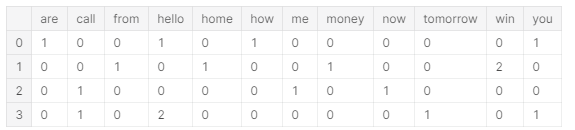

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents['message'])

CountVectorizer()

In [11]:
doc_array = count_vector.transform(documents['message']).toarray()
doc_array

array([[1, 0, 0, 1, 0, 2, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 2, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 2],
       [0, 1, 1, 0, 0, 1, 1]], dtype=int64)

In [12]:
count_vector.get_feature_names()

['couple', 'fast', 'fly', 'fun', 'furious', 'love', 'shoot']

In [13]:
count_vector.vocabulary_

{'fun': 3,
 'couple': 0,
 'love': 5,
 'fast': 1,
 'furious': 4,
 'shoot': 6,
 'fly': 2}

In [14]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,couple,fast,fly,fun,furious,love,shoot
0,1,0,0,1,0,2,0
1,0,1,0,0,1,0,1
2,1,1,1,2,0,0,0
3,0,0,0,1,1,0,2
4,0,1,1,0,0,1,1


In [15]:
frequency_matrix['count'] = frequency_matrix.sum(axis=1)

### step 6. 범주형 변수를 dummy변수로 변환해주는 작업(One-Hot Encoding!)을 해주어야합니다.
#### Q6. label 을 comedy =1, action =0 으로 변환해주세요

In [23]:
documents["label"]=pd.get_dummies(documents["label"])

In [24]:
doc = pd.concat([documents['label'],frequency_matrix],axis=1)

In [25]:
doc

,label,couple,fast,fly,fun,furious,love,shoot,count
0,1,1,0,0,1,0,2,0,4
1,0,0,1,0,0,1,0,1,3
2,1,1,1,1,2,0,0,0,5
3,0,0,0,0,1,1,0,2,4
4,0,0,1,1,0,0,1,1,4


###  step 7. 나이브 베이즈 계산을 해봅시다!

#### Q7. 입력문서가 {fast, furious, fun} 을 주요 단어로 가질때, 이 문서는 얼마의 확률로 어떤 문서로 분류가 될까요? ( 계산과정을 채워주세요) 

In [26]:
doc =  np.array(doc)           # dataframe을 np-array로 변환해줍니다.
                         # return값은 np-matrix가 아니라 np-array입니다.
doc

array([[1, 1, 0, 0, 1, 0, 2, 0, 4],
       [0, 0, 1, 0, 0, 1, 0, 1, 3],
       [1, 1, 1, 1, 2, 0, 0, 0, 5],
       [0, 0, 0, 0, 1, 1, 0, 2, 4],
       [0, 0, 1, 1, 0, 0, 1, 1, 4]], dtype=int64)

In [27]:
type(doc)

numpy.ndarray

####  P(Y=comedy), P(Y=action) 계산하기

y가 comedy의 확률은 간단하다. 전체 y열의 길이에서 y가 comedy인 경우를 찾아주면 된다. 여기서는 doc의 행의 길이를 통해 전체 경우를 찾았다. y가 comedy인 경우는 doc의 첫 번째 열이 1인 경우를 찾아 그 합을 통해 찾았다. doc의 첫 번째 행은 label로 위에서 dummy 변수화 했으며, comedy인 경우 1로 정의했었다.

In [28]:
# P(Y=comedy)
p_comedy = sum(doc[:,0]==1) / len(doc)

# P(Y=action)
p_action = sum(doc[:,0]==0) / len(doc)

In [29]:
print('p_comedy : ',p_comedy)
print('p_action : ', p_action)

p_comedy :  0.4
p_action :  0.6


#### P(fast=1|comedy=1), P(furious=1|comedy=1), P(fun=1|comedy=1) 계산하기
* 참고 : 문서에 두번 등장한 단어 주의

구해야하는 각 조건부 확률의 코드는 아래와 같다. 분모는 comedy일 때, 나온 전체 단어의 개수를 의미한다. 우선 전체 doc array에 y가 1일 때(y가 comedy일 때)의 조건으로 index해준다. 그 중 가장 마지막 열인 count를 다시 index해준 뒤, 그 결과를 sum해주면 comedy일 때, 총 단어의 개수를 구할 수 있다.  

분자의 경우, comedy면서 해당 단어가 동시에 나타나야 하는 교집합임으로 and 조건을 사용해야한다. 그러므로 단어가 나타나는 경우과 comedy인 경우를 &로 묶어주고 이를 조건으로 doc을 index한다. 그리고 index된 array를 다시 해당 단어의 열로 index 해준 뒤, 그 합을 분자로 둔다.  

주의해야할 점은 fun, love, shoot 같은 경우, 단어가 2번 등장하는 경우가 존재한다. 이 때는 1일 때로 조건을 거는 것이 아닌 0이 아닐 때로 조건을 만들어줘야한다는 점을 염두해두자.

In [30]:
# P(fast=1|comedy=1)
p_comedy_fast = sum(doc[(doc[:,0]==1)&(doc[:,2]==1)][:,2]) / sum(doc[doc[:,0]==1][:,-1])

# P(furious=1|comedy=1)
p_comedy_furious = sum(doc[(doc[:,0]==1)&(doc[:,5]==1)][:,5]) / sum(doc[doc[:,0]==1][:,-1]) 

# P(fun=1|comedy=1)
p_comedy_fun = sum(doc[(doc[:,4]!=0)&(doc[:,0]==1)][:,4]) / sum(doc[doc[:,0]==1][:,-1])

#fun의 경우, 문서에도 두 번 등장하는 상황이 있다.
#그러므로 위에서 반복했던 조건과는 달리 0이 아닌 상황들로 묶어서 조건을 걸어야 한다.

In [31]:
print('p_comedy_fast : ' , p_comedy_fast)
print('p_comedy_furious : ' , p_comedy_furious)
print('p_comedy_fun : ' , p_comedy_fun)   

p_comedy_fast :  0.1111111111111111
p_comedy_furious :  0.0
p_comedy_fun :  0.3333333333333333


#### P(fast=1|action=1), P(furious=1|action=1), P(fun=1|action=1) 계산하기
* 참고 : 문서에 두번 등장한 단어 주의

각 조건부 확률을 구하는 코드는 아래와 같다. 과정은 comedy일 때 진행했던 것과 동일하다

In [32]:
# P(fast=1|action=1)
p_action_fast = sum(doc[(doc[:,0]==0)&(doc[:,2]==1)][:,2]) / sum(doc[doc[:,0]==0][:,8])

# P(furious=1|action=1)
p_action_furious = sum(doc[(doc[:,0]==0)&(doc[:,5]==1)][:,5]) / sum(doc[doc[:,0]==0][:,8])

# P(fun=1|action=1)
p_action_fun = sum(doc[(doc[:,0]==0)&(doc[:,4]!=0)][:,4]) / sum(doc[doc[:,0]==0][:,8])

In [33]:
print('p_action_fast : ' , p_action_fast)
print('p_action_furious : ' , p_action_furious)
print('p_action_fun : ' , p_action_fun)  

p_action_fast :  0.18181818181818182
p_action_furious :  0.18181818181818182
p_action_fun :  0.09090909090909091


#### P(Y = comedy| X = fast, furious, fun) , P(Y = action=1| X = fast, furious, fun) 값 계산하기

해당 확률의 계산은 베이즈 정리와 조건부 독립 공식을 사용해서 구하면 된다. 유의할 점은 굳이 분모를 구해주지 않아도 된다는 점이다. 두 값을 비교할 때 분모로 들어가는 P(X = fast, furious, fun)은 어차피 동일한 값이기 때문에 분자의 크기만을 비교해도 결과를 충분히 도출해낼 수 있다.

In [34]:
#P(Y = comedy| X = fast, furious, fun)
proba_comedy = (p_comedy)*(p_comedy_fast)*(p_comedy_furious)*(p_comedy_fun)

#P(Y = action=1| X = fast, furious, fun)
proba_action = (p_action)*(p_action_fast)*(p_action_furious)*(p_action_fun)

In [35]:
print('proba_comedy', proba_comedy)
print('proba_action', proba_action)

proba_comedy 0.0
proba_action 0.001803155522163787


### step 8. 다음 값을 비교해봅시다.
1. P(Y = comedy| X = fast, furious, fun)
2. P(Y = action=1| X = fast, furious, fun)


Q8. 어떤 문제점을 발견할수 있나요? 문제점을 해결하기 위한 방법으로는 어떤게 있을까요?
- A. 위에서 구한 p_comedy_furious의 확률이 0이 되면서 proba_comedy의 값이 0이 되버렸다. 이로 인해서 comedy일지 action일지 제대로 판단할 수 없고, 분류가 불가능한 상황이다. 이를 해결하기 위한 방법으로는 라플라스 스무딩 방법이 있다. 라플라스 스무딩을 통해 최소한의 확률 값을 구할 수 있고, 이를 바탕으로 comedy일지 action일지 판단할 수 있게 된다. 라플라스 스무딩을 통한 값은 아래와 같다.

In [39]:
p_comedy_fast_L = (sum(doc[(doc[:,0]==1)&(doc[:,2]==1)][:,2])+1) / (sum(doc[doc[:,0]==1][:,-1])+(len(doc[0])-2))
p_comedy_furious_L = (sum(doc[(doc[:,0]==1)&(doc[:,5]==1)][:,5])+1) / (sum(doc[doc[:,0]==1][:,-1])+(len(doc[0])-2))
p_comedy_fun_L = (sum(doc[(doc[:,4]!=0)&(doc[:,0]==1)][:,4])+1) / (sum(doc[doc[:,0]==1][:,-1])+(len(doc[0])-2))
p_action_fast_L = (sum(doc[(doc[:,0]==0)&(doc[:,2]==1)][:,2])+1) / (sum(doc[doc[:,0]==0][:,8])+(len(doc[0])-2))
p_action_furious_L = (sum(doc[(doc[:,0]==0)&(doc[:,5]==1)][:,5])+1) / (sum(doc[doc[:,0]==0][:,8])+(len(doc[0])-2))
p_action_fun_L = (sum(doc[(doc[:,0]==0)&(doc[:,4]!=0)][:,4])+1) / (sum(doc[doc[:,0]==0][:,8])+(len(doc[0])-2))

In [40]:
#P(Y = comedy| X = fast, furious, fun)
proba_comedy_L = (p_comedy)*(p_comedy_fast_L)*(p_comedy_furious_L)*(p_comedy_fun_L)

#P(Y = action=1| X = fast, furious, fun)
proba_action_L = (p_action)*(p_action_fast_L)*(p_action_furious_L)*(p_action_fun_L)

In [41]:
print('proba_comedy_L', proba_comedy_L)
print('proba_action_L', proba_action_L)

proba_comedy_L 0.00078125
proba_action_L 0.0018518518518518513


라플라스 스무딩의 경우, 위와 같이 확률이 0이 나와 분류를 못하는 상황을 피하기 위한 처리법이다. 따라서 관측치가 아무리 적어도 1번은 존재한다고 가정하고 이를 피한다. 그래서 분자에는 1을 더해주고, 분모에는 관측했던 단어의 개수만큼 더함으로써 확률이 0이 되는 상황을 피하는 것이다.  

그 결과, proba_action_L이 proba_comedy_L보다 더 큰 것을 확인할 수 있었다. 즉, fast, furious, fun이라는 단어가 들어가면, action일 가능성이 더 크다는 결론을 도출할 수 있다. 